# MTH 651: Advanced Numerical Analysis

## Lecture 7

#### Polynomial interpolation and approximation theory

Recall that we have the finite element error estimate
$$
    \| u - u_h \|_V \leq \frac{\gamma}{\alpha} \inf_{v_h \in V_h} \| u - v_h \|_V,
$$
where $u$ is the true solution to the problem, and $\gamma$ and $\alpha$ are the coercivity and continuity constants of the bilinear form $a(\cdot, \cdot)$.

In order to get an upper bound for $\| u - u_h \|_V$, we estimate $\| u - v_h \|_V$ for a particularly chosen $v_h \in V_h$.

In particular, we are interested in $v_h = \Pi_h u$, where
$$
    \Pi_h : C^0 \to V_h
$$
is the **interpolation operator**, defined as follows.

Recall that each finite element $(K, P_K, \Sigma_K)$ has a set of degrees of freedom $\Sigma_K$.
We can define the local interpolant $\Pi_K : C^0 \to P_K$ by
$$
    \Pi_K(u) = v_h
$$
such that
$$
    \sigma_i(v_h) = \sigma_i(u)
$$
for all $\sigma_i \in \Sigma_K$.
For example, on the linear triangle, $\Pi_K(u)$ is the unique linear polynomial that has the same vertex values as $u$.
On the quadratic triangle, $\Pi_K(u)$ is the unique quadratic polynomial that has the same values as $u$ at the vertices and edge midpoints.

Taking the union of all local degrees of freedom gives the global degrees of freedom
$$
    \Sigma = \bigcup_K \Sigma_K.
$$
The global interpolant $v_h = \Pi_h(u)$ is the unique element of $V_h$ such that
$$
    \sigma(v_h) = \sigma(u)
$$
for all $\sigma \in \Sigma$.
Note that
$$
    v_h|_K = \Pi_K(u).
$$

### Piecewise linear interpolation in 2D

We begin with the case of the piecewise linear finite element space defined on a mesh $\mathcal{T} = \{ K \}$.
For each triangle $K$, define

* $h_K$ is the diameter of $K$ (the length of the longest edge of $K$)
* $\rho_K$ is the diameter of the circle inscribed in $K$

**Theorem.**
Let $K$ be a triangle with vertices $\boldsymbol a^i$.
Let $v \in C^2(K)$, and let $v_h = \Pi_K(v) \in P^1$ be its linear interpolant at the vertices.
Then,
$$
    \| v - v_h \|_{L^\infty(K)} \leq 2 h_K^2 \max_{|\alpha| = 2} \| D^\alpha v \|_{L^\infty(K)}
$$
and
$$
    \max_{|\alpha| = 1} \| D^\alpha (v - v_h) \|_{L^\infty(K)}
    \leq 6 \frac{h_K^2}{\rho_K} \max_{|\alpha| = 2} \| D^\alpha v \|_{L^\infty(K)}.
$$

(Recall that $\| v \|_{L^\infty(K)} = \max_{x \in K} | v(x) |$.)

**Proof.**

Let $\lambda_i$ denote the three linear basis functions on $K$ (the hat functions associated with each vertex).

Note that
$$
    v_h(\boldsymbol x) = \sum_{i=1}^3 v(\boldsymbol a^i) \lambda_i(\boldsymbol x).
$$

The usual tool in polynomial approximation is Taylor expansion.
Expanding $v$ at a point $\boldsymbol x \in K$, we have
$$
    v(\boldsymbol y) = v(\boldsymbol x) + \sum_{j=1}^2 \frac{\partial v}{\partial x_j}(\boldsymbol x)(y_j - x_j) + R(\boldsymbol x, \boldsymbol y),
$$
where $R$ is the remainder term,
$$
    R(\boldsymbol x, \boldsymbol y) = \frac{1}{2} \sum_{i+j=2} \frac{\partial^2 v}{\partial x_i \partial x_j}(\boldsymbol \xi)(y_i - x_i)(y_j - x_j)
$$

We evaluate the Taylor series at each of the vertices $a^i$, giving
$$
    v(\boldsymbol a^i)
    = v(\boldsymbol x) + p_i(\boldsymbol x) + R_i(\boldsymbol x),
$$
where
$$
    p_i(\boldsymbol x) = \sum_{j=1}^2 \frac{\partial v}{\partial x_j}(\boldsymbol x) (a^i_j - x_j)
$$
and
$$
    R_i(\boldsymbol x) = R(\boldsymbol x, \boldsymbol a^i).
$$

Note that $|a^i_j - x_j| \leq h_K$ for all $i$ and $j$.
Therefore,
$$
    |R_i(\boldsymbol x)| \leq 2 h_K^2 \max_{|\alpha| = 2} \| D^\alpha v \|_{L^\infty(K)}
$$

Since
$$
    v_h(\boldsymbol x) = \sum_i v(\boldsymbol a^i) \lambda_i(\boldsymbol x),
$$
we have, from the above,
$$
    v_h(\boldsymbol x) = \sum_i (v(\boldsymbol x) + p_i(\boldsymbol x) + R_i(\boldsymbol x)) \lambda_i(\boldsymbol x).
$$

At this point, we will use the following properties of $\lambda_i$ and $p_i$, whose proof we will defer until after the proof of this theorem.

**Lemma.**

$$ \sum_{i=1}^3 \lambda_i \equiv 1 $$

$$ \sum_{i=1}^3 p_i \lambda_i \equiv 0 $$

$$ \sum_{i=1}^3 \frac{\partial \lambda_i}{\partial x_j} \equiv 0 $$

$$ \sum_{i=1}^3 p_i \frac{\partial \lambda_i}{\partial x_j} = \frac{\partial v}{\partial x_j} $$

Using these results, we have
$$
    v_h(\boldsymbol x) = v(\boldsymbol x) + \sum_{i=1}^3 R_i(\boldsymbol x) \lambda_i(\boldsymbol x),
$$
and so the error is given by
$$
    v(\boldsymbol x) - v_h(\boldsymbol x) = - \sum_{i=1}^3 R_i(\boldsymbol x) \lambda_i(\boldsymbol x).
$$
Since $0 \leq \lambda_i(\boldsymbol x) \leq 1$ for all $\boldsymbol x \in K$, we have
$$
    | v(\boldsymbol x) - v_h(\boldsymbol x) | \leq \sum_{i=1}^3 |R_i(\boldsymbol x) | | \lambda_i(\boldsymbol x) | \leq \max_{i} |R_i(\boldsymbol x)| \leq 2 h_K^2 \max_{|\alpha|=2} \| D^\alpha v \|_{L^\infty(K)}
$$
which proves the first estimate.

Now, we prove the second estimate.
Since
$$
    v_h(\boldsymbol x) = \sum_i v(\boldsymbol a^i) \lambda_i(\boldsymbol x),
$$
we have
$$
    \frac{\partial v_h}{\partial x_j}(\boldsymbol x) = \sum_i v(\boldsymbol a^i) \frac{\partial \lambda_i}{\partial x_j}(\boldsymbol x),
$$
and as before,
$$
    \frac{\partial v_h}{\partial x_j}(\boldsymbol x) = \sum_i (v(\boldsymbol x) + p_i(\boldsymbol x) + R_i(\boldsymbol x)) \frac{\partial \lambda_i}{\partial x_j}(\boldsymbol x).
$$
Using the lemma,
$$
\frac{\partial v_h}{\partial x_j}(\boldsymbol x) = \frac{\partial v}{\partial x_j}(\boldsymbol x) + \sum_{i=1}^3 R_i(\boldsymbol x) \frac{\partial \lambda_i}{\partial x_j}(\boldsymbol x),
$$
and so the error in the $x_j$-derivative is given by
$$
    \frac{\partial v}{\partial x_j}(\boldsymbol x) - \frac{\partial v_h}{\partial x_j}(\boldsymbol x)
    = - \sum_{i=1}^3 R_i(\boldsymbol x) \frac{\partial \lambda_i}{\partial x_j}(\boldsymbol x)
$$
Note that (homework)
$$
    \left| \frac{\partial \lambda_i}{\partial x_j} (\boldsymbol x) \right| \leq \frac{1}{\rho_K}
$$
which gives
$$
    \left| \frac{\partial v}{\partial x_j}(\boldsymbol x) - \frac{\partial v_h}{\partial x_j}(\boldsymbol x) \right|
    \leq 6 \frac{h_K^2}{\rho_K} \max_{|\alpha| = 2} \| D^\alpha v \|_{L^\infty(K)}
$$

**Proof of the lemma.**

Uniqueness of the linear interpolant implies that
$$
    \sum_i \lambda_i \equiv 1,
$$
from which it follows that
$$
    \sum_i \frac{\partial \lambda_i}{\partial x_j}
    = \frac{\partial}{\partial x_j} \sum_i \lambda_i \equiv 0.
$$

We now prove that
$$
    \sum_{i=1}^3 p_i \lambda_i \equiv 0.
$$
Consider $w(\boldsymbol x) := d_1 x_1 + d_2 x_2$ for some constants $d_1, d_2 \in \mathbb{R}$.
Then, the associated $p_i$ are given by
$$
    p_i(\boldsymbol x) = \sum_{j=1}^2 \frac{\partial w}{\partial x_j}(\boldsymbol x)(a^i_j - x_j)
    = \sum_j d_j (a^i_j - x_j)
$$
Then, since $w \in P^1$, we have that $w_h = \Pi_K w = w$, and
$$
    w(\boldsymbol x) = w_h(\boldsymbol x) = w(\boldsymbol x) + \sum_{i=1}^3 p_i(\boldsymbol x) \lambda_i(\boldsymbol x)
$$
from which it follows that
$$
    \sum_i \sum_j d_j (a^i_j - x_j) \lambda_i(\boldsymbol x) = 0
$$
for **all** $d_1, d_2 \in \mathbb{R}^2$.

For given $v$ and $\boldsymbol{x} \in K$, choose $d_1 = \partial v / \partial x_1 (\boldsymbol{x})$ and $d_2 = \partial v / \partial x_2 (\boldsymbol{x})$ and the result follows.

Finally, we prove that
$$
    \sum_{i=1}^3 p_i \frac{\partial \lambda_i}{\partial x_j} = \frac{\partial v}{\partial x_j}.
$$
As before, choose $w = d_1 x_1 + d_2 x_2$ for some $d_1, d_2 \in \mathbb{R}$.
Again, $w_h = w$, and so
$$
\frac{\partial w_h}{\partial x_j}(\boldsymbol x) = d_j = \sum_i (w(\boldsymbol x) + p_i(\boldsymbol x) + R_i(\boldsymbol x)) \frac{\partial \lambda_i}{\partial x_j}(\boldsymbol x).
$$
and further, since the remainder term is zero, and since $\sum_i \partial \lambda_i/\partial x_j \equiv 0$,
$$
d_j = \sum_i \sum_k d_k (a^i_k - x_k) \frac{\partial \lambda_i}{\partial x_j}(\boldsymbol x).
$$
Choosing $d_j$ as above proves the proposition.

Estimates of the exact same form also apply using Sobolev norms:

**Theorem.** Assuming that $v \in H^2(K)$, it holds that
$$
    \| v - v_h \|_{L^2(K)} \leq C h_K^2 | v |_{H^2(K)}
$$
and
$$
    | v - v_h |_{H^1(K)} \leq C \frac{h_K^2}{\rho_K} | v |_{H^2(K)}
$$
for some universal constant $C$.

The proof of this version of the theorem involves some technical complications that we will skip over, but the main idea is the same.

Define $h$ by
$$
    h = \max_K h_K.
$$

We assume that there is a constant $\beta$ independent of the triangulation such that
$$
    \frac{\rho_K}{h_K} \geq \beta
$$
for all $K$.
This is essentially a lower bound on the minimum angle of each triangle.
Such triangulations are called **shape-regular**.

Then, summing over all triangles $K \in \mathcal{T}$,
$$
    \| v - v_h \|_0^2 = \sum_K \| v - v_h \|_{0,K}^2 \leq C^2 h_K^4 | v |_{2,K}^2
    \leq C^2 h^4 | v |_2^2
$$
and similarly,
$$
    | v - v_h |_1^2 \leq C^2 \frac{h^2}{\beta^2} | v |_2^2.
$$

We obtain
$$
    \| v - v_h \|_0 \lesssim h^2 | v |_2
$$
and using the constant $\beta$
$$
    | v - v_h |_1 \lesssim h | v |_2.
$$


### Extension to higher-degree interpolation

We saw an example of the quadratic triangle finite element.
What approximation estimates do we get for higher-degree interpolation?
Without proving these results, we will state that if $v_h = \Pi_h v$, where $\Pi_h$ is the interpolation operator for the piecewise polynomial space of degree $r$, then the following results hold:

$$
    \| v - v_h \|_0 \lesssim h^{r+1} | v |_{r+1}
$$
and
$$
    | v - v_h |_1 \lesssim h^r | v |_{r+1}.
$$

If the function $v$ is not sufficiently regular (suppose $v \in H^s(\Omega)$ where $s < r + 1$), then
$$
    \| v - v_h \|_0 \lesssim h^s | u |_s
$$
and
$$
    | v - v_h |_1 \lesssim h^{s-1} | u |_s.
$$

### Regularity of the exact solution

We see that the error estimates we obtain will depend on the regularity of the exact solution $u$.

For the Poisson problem on $\Omega$, where the boundary $\partial\Omega$ is smooth, then
$$
    \| u \|_{s+2} \leq C \| f \|_s.
$$
In other words, the solution has "two more derivatives" of regularity than the right-hand side.

If the boundary is not smooth, then such a result may fail.

### 2D interpolation demonstration

From the homework, we can create triangular Cartesian grids with the following function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def square_mesh(nx):
    """
    Generates a triangular Cartesian mesh of the unit square with nx vertices in
    each dimension.

    Returns (V, T, B), where V is are the vertex coordinates, T are the triangle
    indices, and B is a list of boundary vertex indices.
    """
    x = np.linspace(0, 1, nx)
    X, Y = np.meshgrid(x, x)
    V = np.stack((X.ravel(), Y.ravel()), axis=1)

    nt = 2*(nx-1)**2
    T = np.zeros((nt, 3), int)

    for iy in range(nx - 1):
        for ix in range(nx - 1):
            v1 = ix + iy*nx
            v2 = ix + 1 + iy*nx
            v3 = ix + (iy + 1)*nx
            v4 = ix + 1 + (iy + 1)*nx
            T[2*ix + iy*2*(nx-1), :] = [v1, v2, v4]
            T[2*ix + 1 + iy*2*(nx-1), :] = [v1, v4, v3]

    B = []
    for i in range(nx):
        B.append(i)
        B.append(i + nx*(nx - 1))
    for i in range(1, nx - 1):
        B.append(nx*i)
        B.append(nx - 1 + nx*i)

    return V, T, B

In [23]:
def f(x, y):
    return np.exp(0.1*np.sin(5.1*x - 6.2*y) + 0.3*np.cos(4.3*x +3.4*y))

We consider the basis of piecewise linear functions made up of "hat functions" that satisfy
$$
\phi_i(\boldsymbol x_j) = \delta_{ij}.
$$
This means that the function
$$
    v_h(\boldsymbol x) := \sum_{i=1}^N f(\boldsymbol x_i) \phi_i (\boldsymbol x)
$$
satisfies
$$
    v_h(\boldsymbol x_i) = f(\boldsymbol x_i)
$$
for all $i$.
In other words, $v_h$ is the **linear interpolant** of $f$.

In the code, we represent $v_h$ using its expansion coefficients $\boldsymbol v = (v_1, \ldots, v_N)$, and we simply set $v_i = f(\boldsymbol x_i)$.

In [26]:
V, T, _ = square_mesh(10)

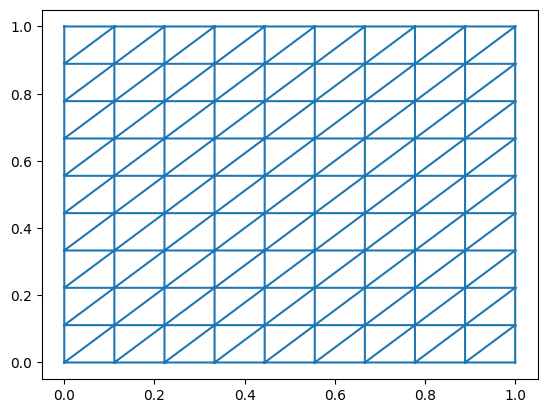

In [27]:
plt.triplot(V[:,0], V[:,1], T)

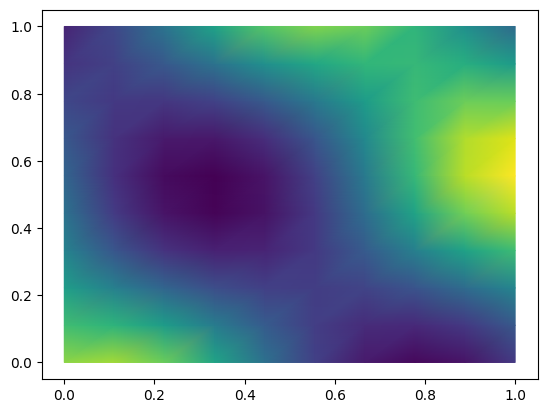

In [28]:
N = V.shape[0]
v = np.zeros(N)

for i in range(N):
    v[i] = f(V[i,0], V[i,1])

# plt.tricontourf(V[:,0], V[:,1], T, v)
plt.tripcolor(V[:,0], V[:,1], v, triangles=T, shading="gouraud")

In [9]:
def centroid_error(f, v, V, T):
    error = 0.0
    for it in range(T.shape[0]):
        centroid = np.mean(V[T[it,:],:], axis=0)
        f_centroid = f(centroid[0], centroid[1])
        v_centroid = np.mean(v[T[it,:]])
        error = max(error, np.abs(f_centroid - v_centroid))
    return error

In [17]:
errors = []
for ref in range(2, 8):
    V, T, _ = square_mesh(2 ** ref)
    v = np.apply_along_axis(lambda x: f(*x), 1, V)
    errors.append(centroid_error(f, v, V, T))

print("Max Centroid Error      Rate")
print("------------------------------------")
for i in range(len(errors)):
    if i > 0:
        rate_fmt = "{:.5f}"
        rate_l2 = np.log2(errors[i-1] / errors[i])
    else:
        rate_fmt = "{}"
        rate_l2 = "---    "
    print("{:10e}".format(errors[i]), " "*11, end="")
    print(rate_fmt.format(rate_l2))

Max Centroid Error      Rate
------------------------------------
1.509413e-01            ---    
5.091496e-02            1.56783
1.180027e-02            2.10927
2.852177e-03            2.04868
6.945684e-04            2.03788
1.711837e-04            2.02057


#### MFEM example

In [29]:
import mfem.ser as mfem
from glvis import glvis

In [33]:
class f_coeff(mfem.PyCoefficient):
    def EvalValue(self, xvec):
        x = xvec[0]
        y = xvec[1]
        return np.exp(0.1*np.sin(5.1*x - 6.2*y) + 0.3*np.cos(4.3*x +3.4*y))

class df_coeff(mfem.VectorPyCoefficient):
    def EvalValue(self, xvec):
        x = xvec[0]
        y = xvec[1]
        f_val = f(x,y)
        return [f_val * (0.1*5.1*np.cos(5.1*x - 6.2*y) - 0.3*4.3*np.sin(4.3*x + 3.4*y)),
                f_val * (-0.1*6.2*np.cos(5.1*x - 6.2*y) - 0.3*3.4*np.sin(4.3*x + 3.4*y)),]

In [ ]:
# create simple mesh by gluing together some triangles
mesh = mfem.Mesh(10, 10, "TRIANGLE")
order_k = 1
fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
u = mfem.GridFunction(fe_space)
u.ProjectCoefficient(f_coeff())
glvis((mesh, u))

0.30813592520379823

In [37]:
l2_errors = []
h1_errors = []
for ref in range(4):
    mesh.UniformRefinement()
    fe_space.Update()
    u.Update()
    u.ProjectCoefficient(f_coeff())
    l2_errors.append(u.ComputeL2Error(f_coeff()))
    h1_errors.append(u.ComputeGradError(df_coeff(mesh.Dimension())))

In [41]:
print("L2 Error         Rate               H1 Error         Rate")
print("------------------------------------------------------------")
for i in range(len(l2_errors)):
    if i > 0:
        rate_fmt = "{:.5f}"
        rate_l2 = np.log2(l2_errors[i-1] / l2_errors[i])
        rate_e = np.log2(h1_errors[i-1] / h1_errors[i])
    else:
        rate_fmt = "{}"
        rate_l2 = "---    "
        rate_e = "---    "
    print("{:10e}".format(l2_errors[i]), "    ", end="")
    print(rate_fmt.format(rate_l2), "           ", end="")
    print("{:10e}".format(h1_errors[i]), "    ", end="")
    print(rate_fmt.format(rate_e), end="")
    print()

L2 Error         Rate               H1 Error         Rate
------------------------------------------------------------
2.155375e-03     ---                1.551762e-01     ---    
5.402588e-04     1.99622            7.772781e-02     0.99740
1.351534e-04     1.99905            3.888141e-02     0.99935
3.379390e-05     1.99976            1.944289e-02     0.99984
